### Credit Card Customer Churn Prediction

Student Name: Yu Qiu  
NUID: 002989268   
Course Number: ALY6140   
Course Name: Analytics Systems Technology   
CRN Number: 20946   
Professor: Venkata Duvvuri  
Date: 03/31/2023  

In [ ]:
#Import libraries required
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv('/Users/qiuyu/Desktop/ALY6140/M2/Capstone/BankChurners.csv')

In [3]:
#check the data shape
df.shape

(10127, 23)

In [4]:
#check the data structure and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [324]:
#check the top rows in the dataset
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [325]:
#check the missing values in this dataset
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [326]:
#cleaning the dataset by removing meaningless values

df_cleaned = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## EDA

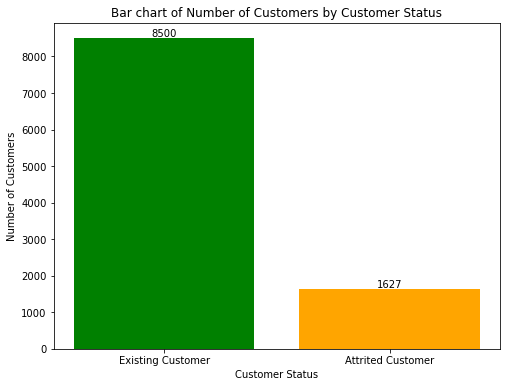

In [423]:
#count the number of customers by customer status
cus_status = df_cleaned['Attrition_Flag'].value_counts().reset_index()
cus_status.columns = ['status', 'num_of_cust']

#define the 2 varables for ploting
status = cus_status['status']
num_of_cust = cus_status['num_of_cust']

#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bar chart
bar_container = plt.bar(status, num_of_cust, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.title("Bar chart of Number of Customers by Customer Status")
plt.bar_label(bar_container)
plt.show()

In [328]:
#calculate the customer churn rate
percent_cust = df_cleaned.Attrition_Flag.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print('The customer churn rate of this bank currently is', percent_cust[1])

The customer churn rate of this bank currently is 16.07%


Text(0, 0.5, 'Frequency')

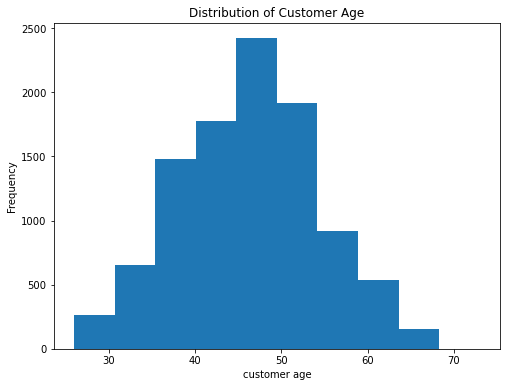

In [329]:
#plot the histogram of customer age
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_cleaned['Customer_Age'])
ax.set_title('Distribution of Customer Age')
ax.set_xlabel('customer age')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Count of Customers')

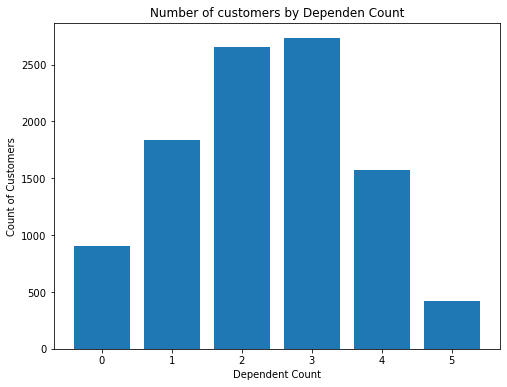

In [416]:
#bar chart of number of dependent of customers
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(df_cleaned['Dependent_count'].value_counts().index, df_cleaned['Dependent_count'].value_counts().values)
ax.set_title('Number of customers by Dependen Count')
ax.set_xlabel('Dependent Count')
ax.set_ylabel('Count of Customers')

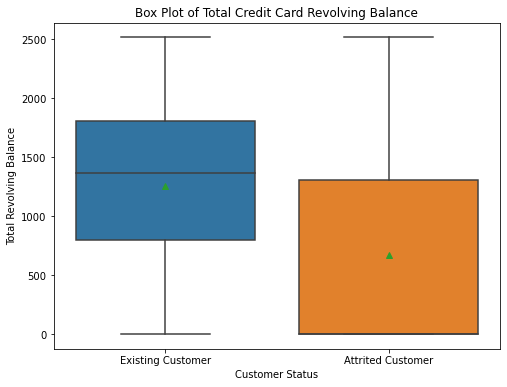

In [331]:
#plot the box plot of Total Credit Card Revolving Balance
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df_cleaned['Attrition_Flag'], y=df_cleaned['Total_Revolving_Bal'], showmeans=True)
plt.xlabel("Customer Status")
plt.ylabel("Total Revolving Balance")
plt.title("Box Plot of Total Credit Card Revolving Balance")
plt.show()

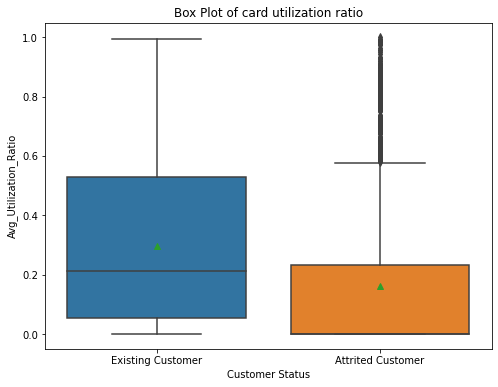

In [332]:
#plot the boxplot of card utimization ratio
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df_cleaned['Attrition_Flag'], y=df_cleaned['Avg_Utilization_Ratio'], showmeans=True)
plt.xlabel("Customer Status")
plt.ylabel("Avg_Utilization_Ratio")
plt.title("Box Plot of card utilization ratio")
plt.show()

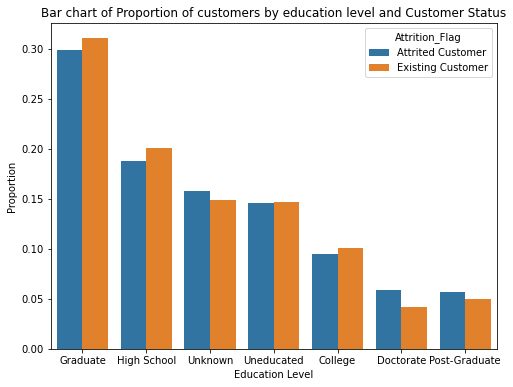

In [418]:
#plot bar chart of Proportion of customers by education level and Customer Status
edu = df_cleaned.groupby('Attrition_Flag', as_index=False)['Education_Level'].value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize=(8,6))
# plot with seaborn barplot
sns.barplot(data=edu, x='Education_Level', y='proportion', hue='Attrition_Flag')

plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.title("Bar chart of Proportion of customers by education level and Customer Status")
plt.bar_label(bar_container)
plt.show()

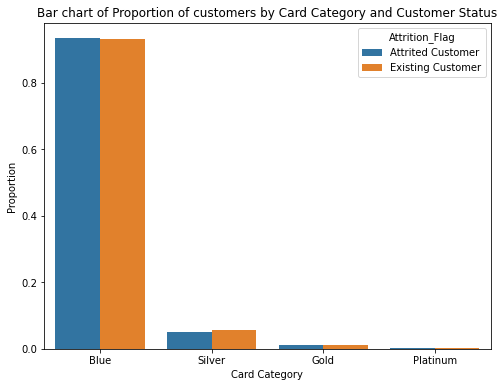

In [419]:
#plot the bar chart of Proportion of customers by Card Category and Customer Status

card = df_cleaned.groupby('Attrition_Flag', as_index=False)['Card_Category'].value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize=(8,6))
# plot with seaborn barplot
sns.barplot(data=card, x='Card_Category', y='proportion', hue='Attrition_Flag')

plt.xlabel("Card Category")
plt.ylabel("Proportion")
plt.title("Bar chart of Proportion of customers by Card Category and Customer Status")
plt.bar_label(bar_container)
plt.show()

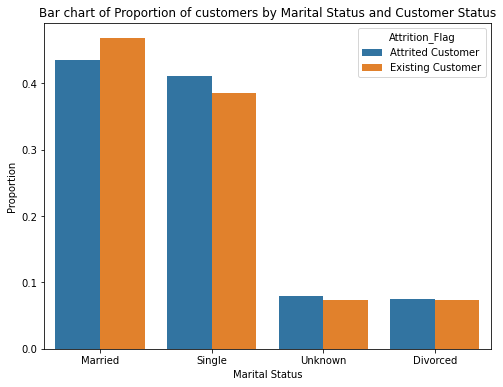

In [421]:
#plot the bar chart of Proportion of customers by Marital Status and Customer Status

marrige = df_cleaned.groupby('Attrition_Flag', as_index=False)['Marital_Status'].value_counts(normalize=True).reset_index()
fig, ax = plt.subplots(figsize=(8,6))
# plot with seaborn barplot
sns.barplot(data=marrige, x='Marital_Status', y='proportion', hue='Attrition_Flag')

plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.title("Bar chart of Proportion of customers by Marital Status and Customer Status")
plt.bar_label(bar_container)
plt.show()

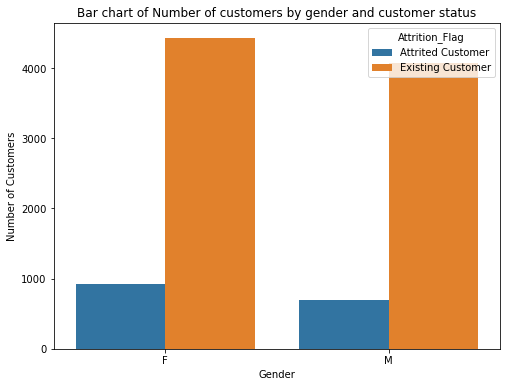

In [417]:
#bar chart of Number of customers by gender and customer status
gender_df = df_cleaned.groupby('Attrition_Flag', as_index=False)['Gender'].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
# plot with seaborn barplot
sns.barplot(data=gender_df, x='Gender', y='count', hue='Attrition_Flag')

plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Bar chart of Number of customers by gender and customer status")
plt.show()

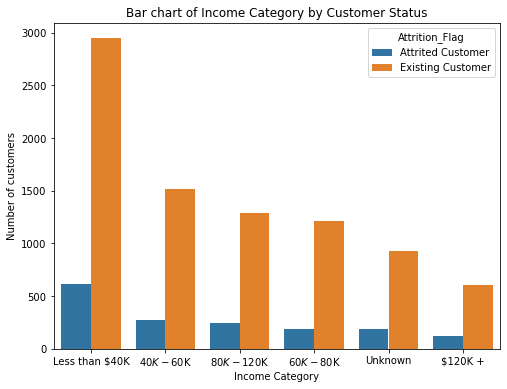

In [337]:
#Bar chart of Income Category by Customer Status
income_df = df_cleaned.groupby('Attrition_Flag', as_index=False)['Income_Category'].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
# plot with seaborn barplot
sns.barplot(data=income_df, x='Income_Category', y='count', hue='Attrition_Flag')

plt.xlabel("Income Category")
plt.ylabel("Number of customers")
plt.title("Bar chart of Income Category by Customer Status")
plt.show()

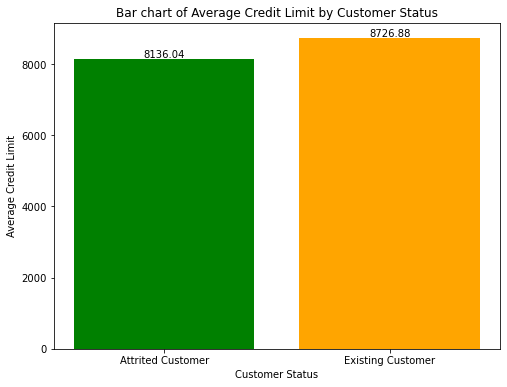

In [422]:
#calculate the aveage credit limit by attrition flag
credit = df_cleaned.groupby('Attrition_Flag')['Credit_Limit'].mean().reset_index()
    
status = credit['Attrition_Flag']
value = credit['Credit_Limit']


#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(status, value, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Average Credit Limit")
plt.title("Bar chart of Average Credit Limit by Customer Status")
plt.bar_label(bar_container)
plt.show()

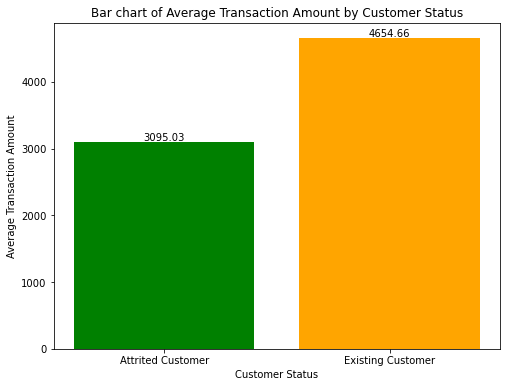

In [339]:
#calculate the aveage Total_Trans_Amt by attrition flag

trans_df = df_cleaned.groupby('Attrition_Flag')['Total_Trans_Amt'].mean().reset_index()

status = trans_df['Attrition_Flag']
value = trans_df['Total_Trans_Amt']


#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(status, value, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Average Transaction Amount")
plt.title("Bar chart of Average Transaction Amount by Customer Status")
plt.bar_label(bar_container)
plt.show()

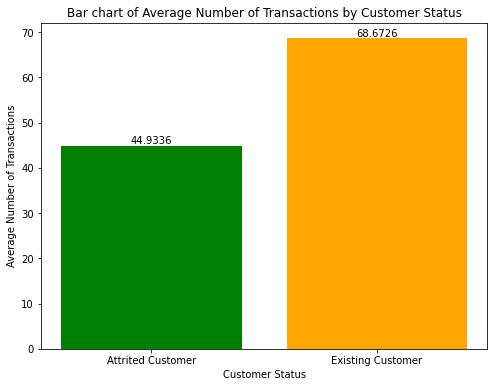

In [340]:
#calculate the aveage Total_Trans_Ct by attrition flag
trans_ct = df_cleaned.groupby('Attrition_Flag')['Total_Trans_Ct'].mean().reset_index()

status = trans_ct['Attrition_Flag']
value = trans_ct['Total_Trans_Ct']


#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(status, value, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Average Number of Transactions")
plt.title("Bar chart of Average Number of Transactions by Customer Status")
plt.bar_label(bar_container)
plt.show()

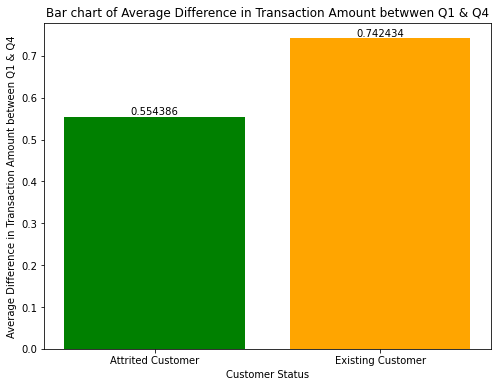

In [341]:

#calculate the aveage Total_Ct_Chng_Q4_Q1 by attrition flag
change = df_cleaned.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].mean().reset_index()
status = change['Attrition_Flag']
value = change['Total_Ct_Chng_Q4_Q1']


#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(status, value, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Average Difference in Transaction Amount between Q1 & Q4")
plt.title("Bar chart of Average Difference in Transaction Amount betwwen Q1 & Q4")
plt.bar_label(bar_container)
plt.show()

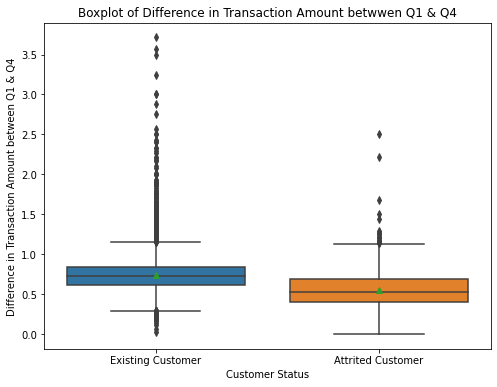

In [342]:
#plot the box plot of Difference in Transaction Amount betwwen Q1 & Q4

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df_cleaned['Attrition_Flag'], y=df_cleaned['Total_Ct_Chng_Q4_Q1'], showmeans=True)
plt.xlabel("Customer Status")
plt.ylabel("Difference in Transaction Amount between Q1 & Q4")
plt.title("Boxplot of Difference in Transaction Amount betwwen Q1 & Q4")
plt.show()

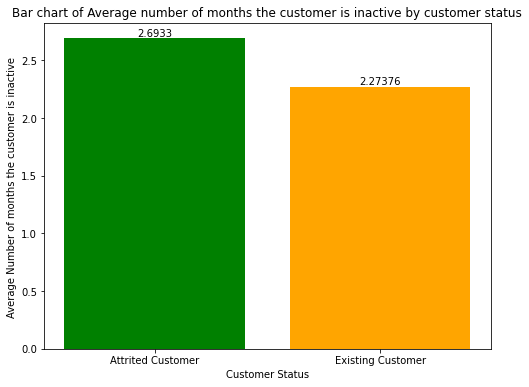

In [343]:
#calculate the aveage Months_Inactive_12_mon by attrition flag


inactive = df_cleaned.groupby('Attrition_Flag')['Months_Inactive_12_mon'].mean().reset_index()
status = inactive['Attrition_Flag']
value = inactive['Months_Inactive_12_mon']


#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(status, value, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Average Number of months the customer is inactive ")
plt.title("Bar chart of Average number of months the customer is inactive by customer status")
plt.bar_label(bar_container)
plt.show()

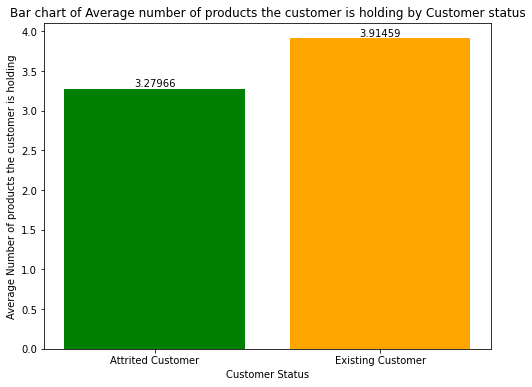

In [344]:
#calculate the aveage Total_Relationship_Count by attrition flag
num_pro = df_cleaned.groupby('Attrition_Flag')['Total_Relationship_Count'].mean().reset_index()

status = num_pro['Attrition_Flag']
value = num_pro['Total_Relationship_Count']


#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(status, value, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Average Number of products the customer is holding")
plt.title("Bar chart of Average number of products the customer is holding by Customer status")
plt.bar_label(bar_container)
plt.show()

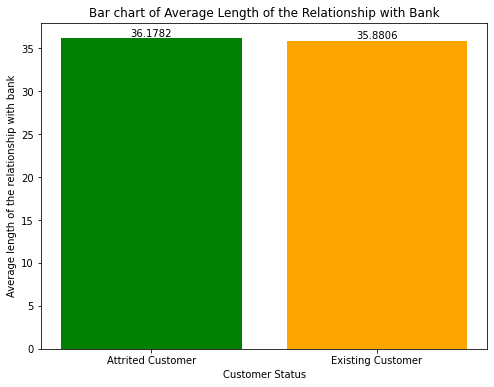

In [345]:
#calculate the aveage Months_on_book by attrition flag

length = df_cleaned.groupby('Attrition_Flag')['Months_on_book'].mean().reset_index()
status = length['Attrition_Flag']
value = length['Months_on_book']


#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(status, value, color=['green', 'orange'])

plt.xlabel("Customer Status")
plt.ylabel("Average length of the relationship with bank")
plt.title("Bar chart of Average Length of the Relationship with Bank")
plt.bar_label(bar_container)
plt.show()

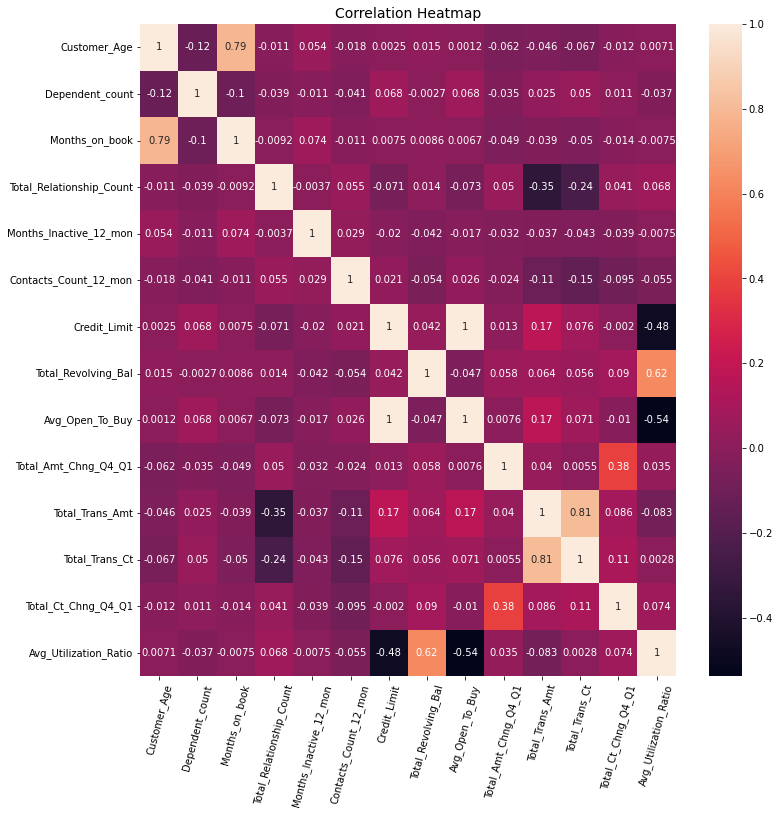

In [347]:
#create correlation matrix
plt.figure(figsize = (12,12))

matrix = df_cleaned.corr()
sns.heatmap(matrix, annot=True)
 # set a title and labels
plt.yticks(rotation = 360)
plt.xticks(rotation = 75)
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

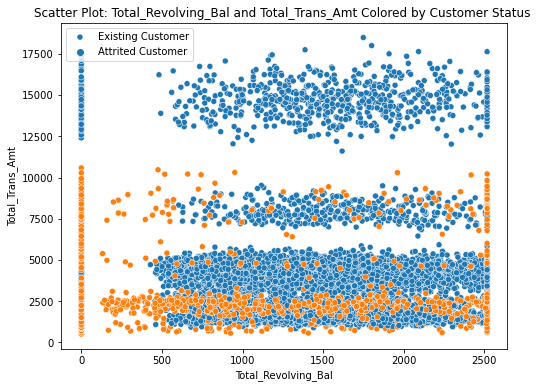

In [348]:
#plot the scatter plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Total_Revolving_Bal', y='Total_Trans_Amt', hue='Attrition_Flag', data=df_cleaned, legend="full")
 # set a title and labels
ax.set_title('Scatter Plot: Total_Revolving_Bal and Total_Trans_Amt Colored by Customer Status ')
ax.set_xlabel('Total_Revolving_Bal')
ax.set_ylabel('Total_Trans_Amt')
plt.legend(["Existing Customer" , "Attrited Customer"])
plt.show()

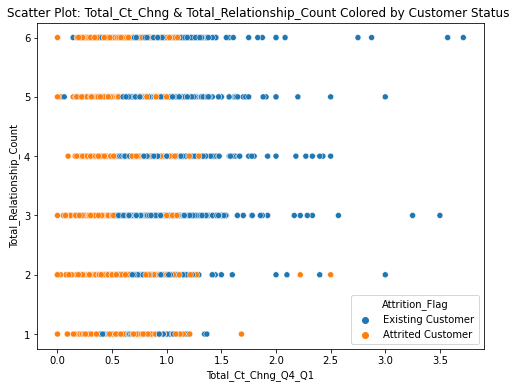

In [349]:
#plot the scatter plot 

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Total_Ct_Chng_Q4_Q1', y='Total_Relationship_Count', hue='Attrition_Flag', data=df_cleaned)
# set a title and labels
ax.set_title('Scatter Plot: Total_Ct_Chng & Total_Relationship_Count Colored by Customer Status ')
ax.set_xlabel('Total_Ct_Chng_Q4_Q1')
ax.set_ylabel('Total_Relationship_Count')
plt.show()

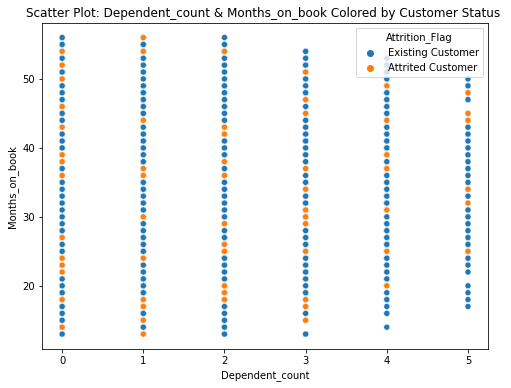

In [350]:
#plot the scatter plot
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Dependent_count', y='Months_on_book', hue='Attrition_Flag', data=df_cleaned)

# set a title and labels
ax.set_title('Scatter Plot: Dependent_count & Months_on_book Colored by Customer Status ')
ax.set_xlabel('Dependent_count')
ax.set_ylabel('Months_on_book')
plt.show()

## Feature Engineering and Selection

In [351]:
#find the categorical variables
categorical = df_cleaned.columns[df_cleaned.dtypes == object]
#encode the categorical variables
df_new = pd.get_dummies(df_cleaned, columns = categorical, drop_first=True)

In [352]:
#check the data type
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  int64  
 8   Avg_Open_To_Buy                   10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 10  Total_Trans_Amt                   10127 non-null  int64  
 11  Total_Trans_Ct                    10127 non-null  int64  
 12  Tota

In [353]:
#define the target variable and independent variables
y= df_new['Attrition_Flag_Existing Customer']
x = df_new.drop(['Attrition_Flag_Existing Customer'], axis =1)

In [354]:
#split data
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=111)

In [355]:
#check the shape of training set and test set
print('The shape of train_x is {}.'.format(train_x.shape))
print('The shape of test_x is {}.'.format(test_x.shape))
print('The shape of train_y is {}.'.format(train_y.shape))
print('The shape of test_y is {}.'.format(test_y.shape))

The shape of train_x is (7088, 32).
The shape of test_x is (3039, 32).
The shape of train_y is (7088,).
The shape of test_y is (3039,).


In [356]:
# Over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
train_x, train_y = ros.fit_resample(train_x, train_y)

In [357]:
#check the number of churned customers and exsiting customers after oversampling
train = train_y.value_counts().reset_index()
train.columns = ['Attrition_Flag_Existing_Customer', 'Count']

train

,Attrition_Flag_Existing_Customer,Count
0,1,5934
1,0,5934


In [358]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_x)
train_x_std = sc.transform(train_x)
test_x_std = sc.transform(test_x)
train_x_std = pd.DataFrame(train_x_std, columns = train_x.columns)
test_x_std = pd.DataFrame(test_x_std, columns = test_x.columns)

In [359]:
#PCA Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=32)

train_x_pca = pca.fit_transform(train_x_std)
train_x_pca = pd.DataFrame(train_x_pca, columns = train_x.columns)
train_x_pca

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.923565,3.900168,1.207073,-0.278946,1.727199,0.762229,-0.644392,-1.009896,-1.969496,0.783664,...,-0.800541,-0.394500,-0.033943,-0.301780,0.144279,0.144208,0.043796,-0.177439,0.048106,4.640985e-16
1,0.627965,0.846249,-0.865360,-1.143867,1.687175,0.937694,-0.000291,2.057239,1.105615,0.863740,...,0.367591,-0.933152,-0.309717,0.346333,-0.436673,-0.218516,-0.528183,1.035349,-0.196643,-7.185236e-15
2,0.391758,-0.231775,-2.920142,0.560427,-1.899424,0.160736,0.061934,-1.161566,0.698246,-0.821185,...,0.670532,-0.050653,-0.185220,-0.214457,-0.951928,0.011627,-0.035580,-0.097723,-0.000398,-2.346659e-15
3,-0.400425,0.899585,-0.881396,-1.159638,0.450150,-0.499814,-1.576669,1.296388,-0.515146,1.016585,...,-0.308022,-0.203662,-0.764765,0.029206,0.154223,-0.497217,-0.011932,-0.253980,0.192589,-2.456359e-15
4,-0.887121,0.474853,0.807798,-0.961769,-1.044635,-1.003708,-0.543408,1.114010,-1.972648,0.201656,...,0.464643,0.035924,-0.585829,0.143983,0.321185,-0.195910,-0.065460,-0.188613,0.196046,9.075364e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11863,-2.352467,1.618448,0.803170,-0.510725,-1.252202,1.158865,1.242020,-0.706813,-0.661665,0.519470,...,0.068583,-0.153597,0.037133,-0.097409,0.755744,0.706335,-0.100114,-0.092351,0.012398,7.837271e-17
11864,-1.680570,-2.531311,0.498146,0.389516,1.321331,-0.998873,0.497366,-0.978507,-0.145547,1.228031,...,0.782908,0.031859,-0.071409,-0.022767,-0.172009,-0.269828,-0.095893,-0.134593,0.001117,-9.673975e-17
11865,-2.157314,0.589304,0.129002,-0.819817,-1.270607,1.006545,1.969459,0.066011,0.554277,1.901810,...,-0.673119,-0.231821,0.110060,-0.545858,-0.261293,0.060158,-0.062010,-0.124079,-0.029850,1.996574e-16
11866,0.309156,-0.391792,-0.473321,-0.954579,-2.371998,0.903056,1.134161,-0.480155,-1.940722,-1.666536,...,0.315522,0.841000,0.051256,-0.323491,-0.317984,-0.138061,-0.128659,-0.138867,0.111527,1.719301e-16


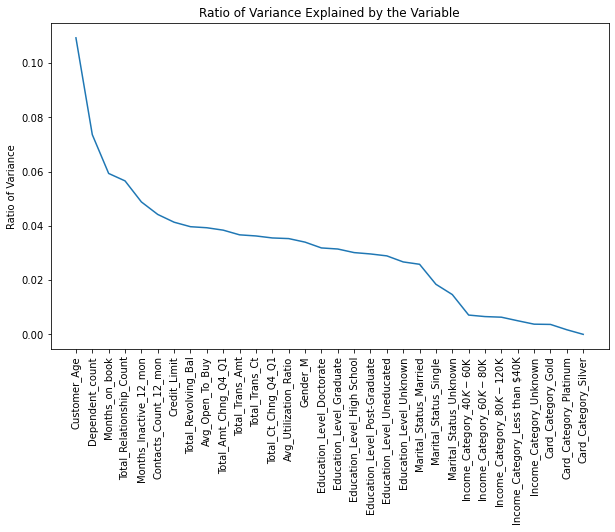

In [360]:
#find the explained variance by the variables
explained_variance = pca.explained_variance_ratio_

#plot the Ratio of Variance Explained by the Variable
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(train_x.columns, explained_variance)
plt.title('Ratio of Variance Explained by the Variable')
plt.ylabel('Ratio of Variance')
plt.xticks(rotation = 90)
plt.show()


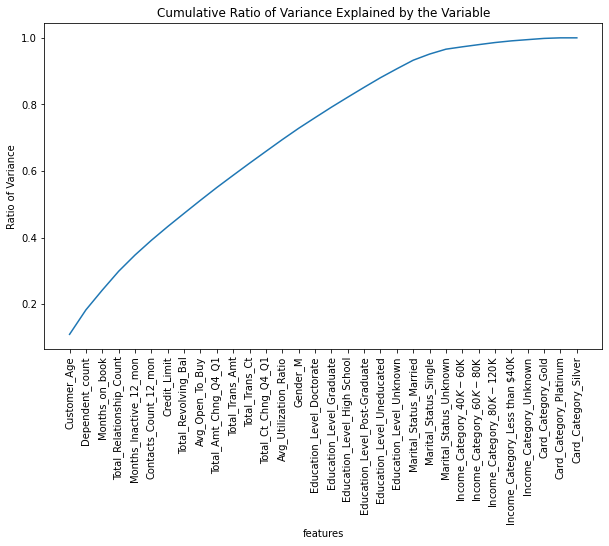

In [361]:
#calculate the cumulative ratio
pca_df = pd.DataFrame(train_x.columns, explained_variance).reset_index()
pca_df.columns = ['variance', 'features']
pca_df['variance_cum'] = pca_df['variance'].cumsum(axis =0)

#plot the cumulative ratio
fig, ax = plt.subplots(figsize=(10,6))
line = sns.lineplot(x = 'features', y = 'variance_cum', data=pca_df)

# Annotate label points 
plt.title('Cumulative Ratio of Variance Explained by the Variable')
plt.ylabel('Ratio of Variance')
plt.xticks(rotation = 90)
plt.show()

In [362]:
#see the detailed cumulative ratio of variance explained
pca_df

,variance,features,variance_cum
0,1.092947e-01,Customer_Age,0.109295
1,7.360432e-02,Dependent_count,0.182899
2,5.930573e-02,Months_on_book,0.242205
3,5.656774e-02,Total_Relationship_Count,0.298773
4,4.880953e-02,Months_Inactive_12_mon,0.347582
5,4.419681e-02,Contacts_Count_12_mon,0.391779
6,4.133240e-02,Credit_Limit,0.433111
7,3.967868e-02,Total_Revolving_Bal,0.472790
8,3.929347e-02,Avg_Open_To_Buy,0.512083
9,3.840785e-02,Total_Amt_Chng_Q4_Q1,0.550491


### Random Forest using Selected Features

In [392]:
#selecting the features for test and training set
train_x_sel = train_x.drop(train_x.iloc[:, 23:31], axis = 1)
test_x_sel = test_x.drop(test_x.iloc[:, 23:31], axis = 1)

In [393]:
#import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import plot_confusion_matrix

In [394]:
#train the random forst model
rf_s = RandomForestClassifier(random_state=333)
rf_s.fit(train_x_sel, train_y)

RandomForestClassifier(random_state=333)

In [395]:
#make predictions with the model
y_pred_s = rf_s.predict(test_x_sel)

In [396]:
#check the accuracy, precision and recall

accuracy_s = accuracy_score(test_y, y_pred_s)
precision_s = precision_score(test_y, y_pred_s)
recall_s = recall_score(test_y, y_pred_s)

print("Accuracy of Random Forest with PCA selected Features:", accuracy_s)
print("Precision of Random Forest with PCA selected Features:", precision_s)
print("Recall of Random Forest with PCA selected Features:", recall_s)

Accuracy of Random Forest with PCA selected Features: 0.9631457716354064
Precision of Random Forest with PCA selected Features: 0.974477958236659
Recall of Random Forest with PCA selected Features: 0.9820732657833203


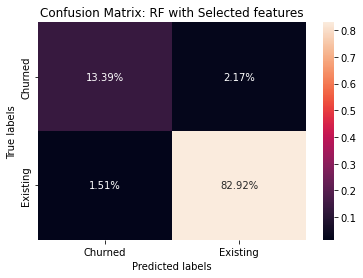

In [397]:
# Generate predictions with the best model
y_pred_s = rf_s.predict(test_x_sel)

# Create the confusion matrix
cm_sl = confusion_matrix(test_y, y_pred_s)

#plot the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_sl/np.sum(cm_sl), annot=True, 
            fmt='.2%')
plt.title('Confusion Matrix: RF with Selected features')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Churned', 'Existing']); ax.yaxis.set_ticklabels(['Churned', 'Existing']);
plt.show()

In [398]:
#define the parameter distribution for tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search_s = RandomizedSearchCV(rf_s, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search_s.fit(train_x_sel, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=333),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faac7553460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faac7562280>})

In [399]:
# Create a variable for the best model
best_rf_s = rand_search_s.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  best_rf_s)

Best hyperparameters: RandomForestClassifier(max_depth=19, n_estimators=74, random_state=333)


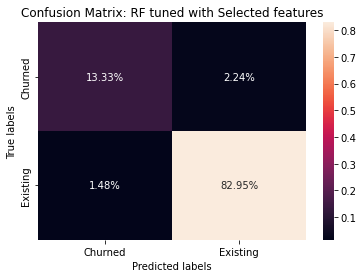

In [400]:
# Generate predictions with the best model
y_pred_s_t = best_rf_s.predict(test_x_sel)

# Create the confusion matrix
cm = confusion_matrix(test_y, y_pred_s_t)

ax= plt.subplot()
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.title('Confusion Matrix: RF tuned with Selected features')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Churned', 'Existing']); ax.yaxis.set_ticklabels(['Churned', 'Existing']);
plt.show()

In [401]:
#check the accuracy, precision and recall
accuracy_tune = accuracy_score(test_y, y_pred_s_t)
precision_tune = precision_score(test_y, y_pred_s_t)
recall_tune = recall_score(test_y, y_pred_s_t)

print("Accuracy of tuned Random Forest with PCA selected Features:", accuracy_tune)
print("Precision of tuned Random Forest with PCA selected Features:", precision_tune)
print("Recall of tuned Random Forest with PCA selected Features:", recall_tune)

Accuracy of tuned Random Forest with PCA selected Features: 0.9628167160250082
Precision of tuned Random Forest with PCA selected Features: 0.973735032831209
Recall of tuned Random Forest with PCA selected Features: 0.9824629773967264


In [402]:
#create a table for the metrics
accuracy = [accuracy_s, accuracy_tune]
precision = [precision_s, precision_tune]
recall = [recall_s, recall_tune]

L = [list(row) for row in zip(accuracy, precision, recall)]
performance_rf_s = pd.DataFrame(L, columns=['accuracy', 'precision', 'recall'])
performance_rf_s.index = ['rf_s', 'rf_s_tuned']
performance_rf_s


,accuracy,precision,recall
rf_s,0.963146,0.974478,0.982073
rf_s_tuned,0.962817,0.973735,0.982463


### Random Forest

In [403]:
#train a random forest model with all features
rf = RandomForestClassifier(random_state=555)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=555)

In [404]:
#make the prediction
y_pred = rf.predict(test_x)

In [406]:
#check the accuracy, precision and recall
accuracy_2 = accuracy_score(test_y, y_pred)
precision_2 = precision_score(test_y, y_pred)
recall_2 = recall_score(test_y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9634748272458046
Precision: [0.974477958236659, 0.973735032831209]
Recall: [0.9820732657833203, 0.9824629773967264]


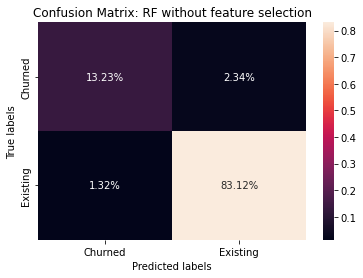

In [407]:

# Create the confusion matrix
cm = confusion_matrix(test_y, y_pred)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.title('Confusion Matrix: RF without feature selection')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Churned', 'Existing']); ax.yaxis.set_ticklabels(['Churned', 'Existing']);
plt.show()

In [408]:
#define the parameter distribution for tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}


# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=555),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faac79eb220>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faa44cc0df0>})

In [409]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 439}


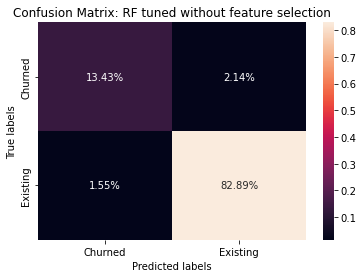

In [410]:
# Generate predictions with the best model
y_pred_t = best_rf.predict(test_x)

# Create the confusion matrix
cm_2 = confusion_matrix(test_y, y_pred_t)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_2/np.sum(cm_2), annot=True, 
            fmt='.2%')
plt.title('Confusion Matrix: RF tuned without feature selection')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Churned', 'Existing']); ax.yaxis.set_ticklabels(['Churned', 'Existing']);
plt.show()

In [411]:
#check the accuracy, precision and recall
accuracy_t = accuracy_score(test_y, y_pred_t)
precision_t = precision_score(test_y, y_pred_t)
recall_t = recall_score(test_y, y_pred_t)

print("Accuracy:", accuracy_t)
print("Precision:", precision_t)
print("Recall:", recall_t)

Accuracy: 0.9631457716354064
Precision: 0.9748452012383901
Recall: 0.9816835541699143


In [412]:
#create a table for the metrics
accuracy_d = [accuracy_2, accuracy_t]
precision_d = [precision_2, precision_t]
recall_d = [recall_2, recall_t]

L = [list(row) for row in zip(accuracy_d, precision_d, recall_d)]
performance_rf_s = pd.DataFrame(L, columns=['accuracy', 'precision', 'recall'])
performance_rf_s.index = ['rf_s', 'rf_s_tuned']
performance_rf_s

,accuracy,precision,recall
rf_s,0.963475,0.972661,0.984412
rf_s_tuned,0.963146,0.974845,0.981684


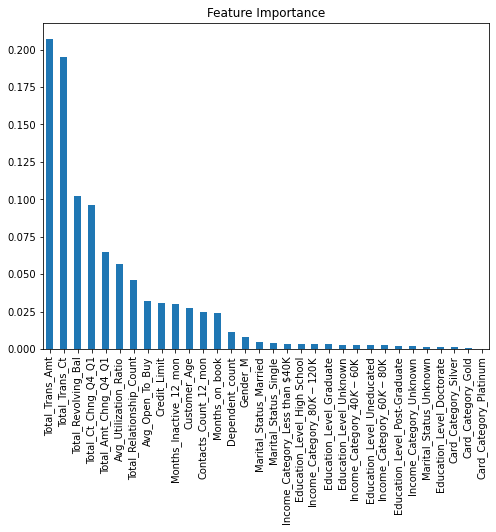

In [415]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=train_x.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig, ax = plt.subplots(figsize=(8,6))
feature_importances.plot.bar();
plt.title('Feature Importance')
plt.show()